In [1]:
import torch

model = torch.load('runs/run6/models/best_model.pt')

/home/cipta/anaconda3/envs/python2/lib/python2.7/site-packages/torch/serialization.py:277: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [2]:
emb = model.encoder

In [6]:
import data
corpus = data.Corpus('./data/penn')

In [17]:
inp = torch.LongTensor(range(10))
inp


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
[torch.LongTensor of size 10]

In [18]:
from torch.autograd import Variable
inpv = Variable(inp)

In [19]:
emb(inpv)

Variable containing:
-7.4052e-01  3.0768e-01 -2.7133e-01  ...   1.5114e-01 -7.4067e-02 -3.0299e-01
-4.9578e-01 -5.3759e-01 -2.4438e-01  ...  -9.5905e-02 -2.0868e-01  1.7802e-03
 3.9292e-01 -4.2782e-01  1.7976e-04  ...  -8.2970e-01  7.8206e-01 -2.5006e-01
                ...                   ⋱                   ...                
 2.8281e-02 -4.5363e-01 -1.6841e-01  ...  -2.8529e-02  5.5098e-01 -4.4243e-01
-7.6162e-02 -5.5327e-02 -7.2724e-01  ...  -3.7568e-01  4.0452e-01 -1.1237e-01
-3.9154e-01 -2.7038e-03 -4.3995e-01  ...   2.4309e-01 -1.3961e-01 -5.9353e-01
[torch.FloatTensor of size 10x200]

In [24]:
emb_params = list(emb.parameters())

In [27]:
emb_np = emb_params[0].data.numpy()

In [28]:
emb_np.shape

(10000, 200)

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE()
emb_tsne = tsne.fit_transform(emb_np)

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
emb_tsne.shape

(10000, 2)

In [88]:
n_labels = 100

import numpy as np
my_labels = list(corpus.dictionary.idx2word)
np.random.shuffle(my_labels)
my_labels = my_labels[:n_labels]
my_labels[:10]

['facilities',
 'primary',
 'proposition',
 'global',
 'poor',
 'coordinator',
 'chip',
 'corry',
 'petrochemicals',
 'handles']

In [90]:
labels_print = [(corpus.dictionary.word2idx[x], x) for x in my_labels]

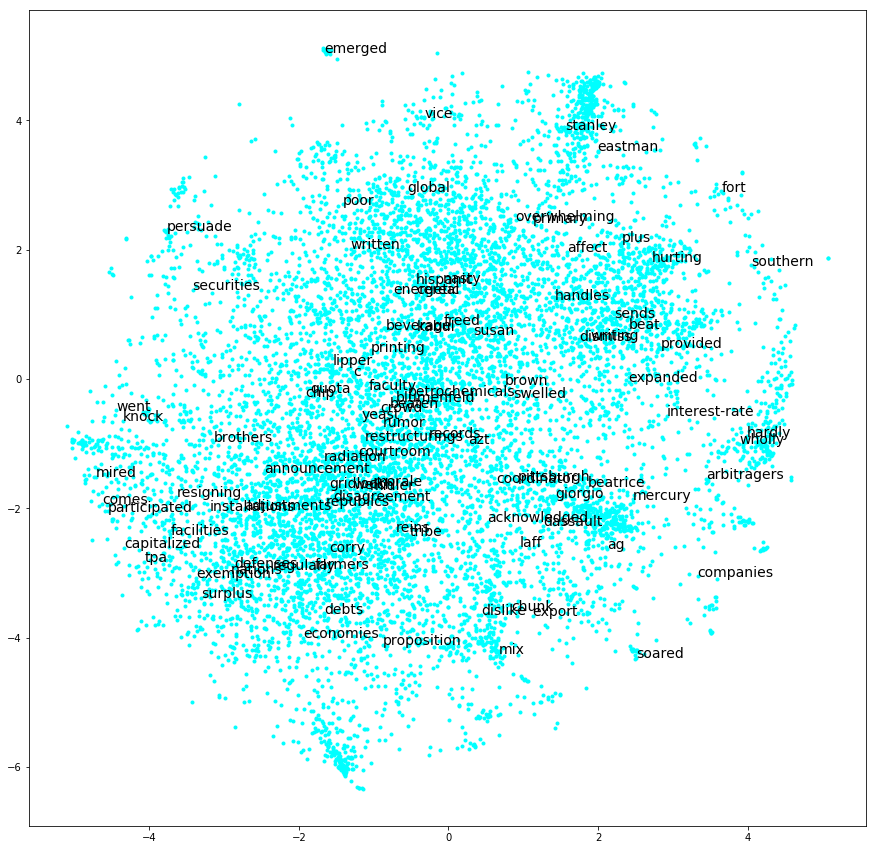

In [91]:
plt.figure(figsize=(15, 15))
plt.scatter(emb_tsne[:,0], emb_tsne[:,1], marker='.', color='cyan')
for idx, label in labels_print:
    emb_x, emb_y = emb_tsne[idx,:]
    plt.text(emb_x, emb_y, label, fontsize=14)
plt.show()